In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_csv("Housing.csv")

In [4]:
#explore the data.
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
#to know the number of row and columns
data.shape

(545, 13)

In [6]:
#what the size of the dataset.
data.size

7085

In [7]:
# to know abous the data type and if we have a null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# some statistical method.
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# change the categorical data to numeric
data.mainroad.unique()


array(['yes', 'no'], dtype=object)

In [10]:
data.mainroad.replace({"yes":0,"no":1},inplace = True)

In [11]:
data.guestroom.replace({"yes":0,"no":1},inplace = True)

In [12]:
data.basement.replace({"yes":0,"no":1},inplace = True)

In [13]:
data.hotwaterheating.replace({"yes":0,"no":1},inplace = True)

In [14]:
data.airconditioning.replace({"yes":0,"no":1},inplace = True)

In [15]:
data.prefarea.replace({"yes":0,"no":1},inplace = True)

In [16]:
data.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [17]:
data.furnishingstatus.replace({"furnished":0,"semi-furnished":1,"unfurnished":2},inplace = True)

In [18]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0
5,10850000,7500,3,3,1,0,1,0,1,0,2,0,1
6,10150000,8580,4,3,4,0,1,1,1,0,2,0,1
7,10150000,16200,5,3,2,0,1,1,1,1,0,1,2
8,9870000,8100,4,1,2,0,0,0,1,0,2,0,0
9,9800000,5750,3,2,4,0,0,1,1,0,1,0,2


In [19]:
#Correlation Cofficients
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,-0.296898,-0.255517,-0.187057,-0.093073,-0.452954,0.384394,-0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,-0.288874,-0.140297,-0.047417,0.009229,-0.222393,0.352980,-0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.012033,-0.080549,-0.097312,-0.046049,-0.160603,0.139270,-0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,-0.042398,-0.126469,-0.102106,-0.067159,-0.186915,0.177496,-0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,-0.121706,-0.043538,0.172394,-0.018847,-0.293602,0.045547,-0.044425,-0.104672
mainroad,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,-0.204433,0.199876,0.156726
guestroom,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,-0.037466,0.160897,0.118328
basement,-0.187057,-0.047417,-0.097312,-0.102106,0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,-0.051497,0.228083,0.112831
hotwaterheating,-0.093073,0.009229,-0.046049,-0.067159,-0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.067864,-0.059411,0.031628
airconditioning,-0.452954,-0.222393,-0.160603,-0.186915,-0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,-0.159173,0.117382,0.150477


In [20]:
# define the input and output variabls
X = data.drop('price', axis = 1)
Y = data[['price']]

In [21]:
# split the data to training and testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [22]:
# call the linear function and fit the model
reg_model = linear_model.LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# calculate the intercept and the coefficent
intercept = reg_model.intercept_[0]
coefficent = reg_model.coef_[0][0]

print("the intercept is {:.8}".format(intercept))
print("the coefficent is {:.4}".format(coefficent))

the intercept is 4027560.3
the coefficent is 253.7


In [24]:
# test the model 
prediction = reg_model.predict([[110, 4, 2, 3, 1, 0, 1, 1, 0, 2, 1, 1]])
predicted = prediction[0][0]
print("the predicted is {:.8}".format(predicted))

the predicted is 5377329.4


C:\Users\hassa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
y_predict = reg_model.predict(X_test)

y_predict[:3]

array([[4019080.69890147],
       [6258021.768564  ],
       [4392719.13411048]])

In [26]:
# evaluate the model by calculate mse, mae and r2 score
mse = mean_squared_error(y_test, y_predict)

mae = mean_absolute_error(y_test, y_predict)

print("mse {:.15}".format(mse))
print("mae {:.8}".format(mae))

mse 986041803890.027
mae 716583.44


In [27]:
r2 = r2_score(y_test, y_predict)
print("r2_score {:.2}".format(r2))

r2_score 0.66


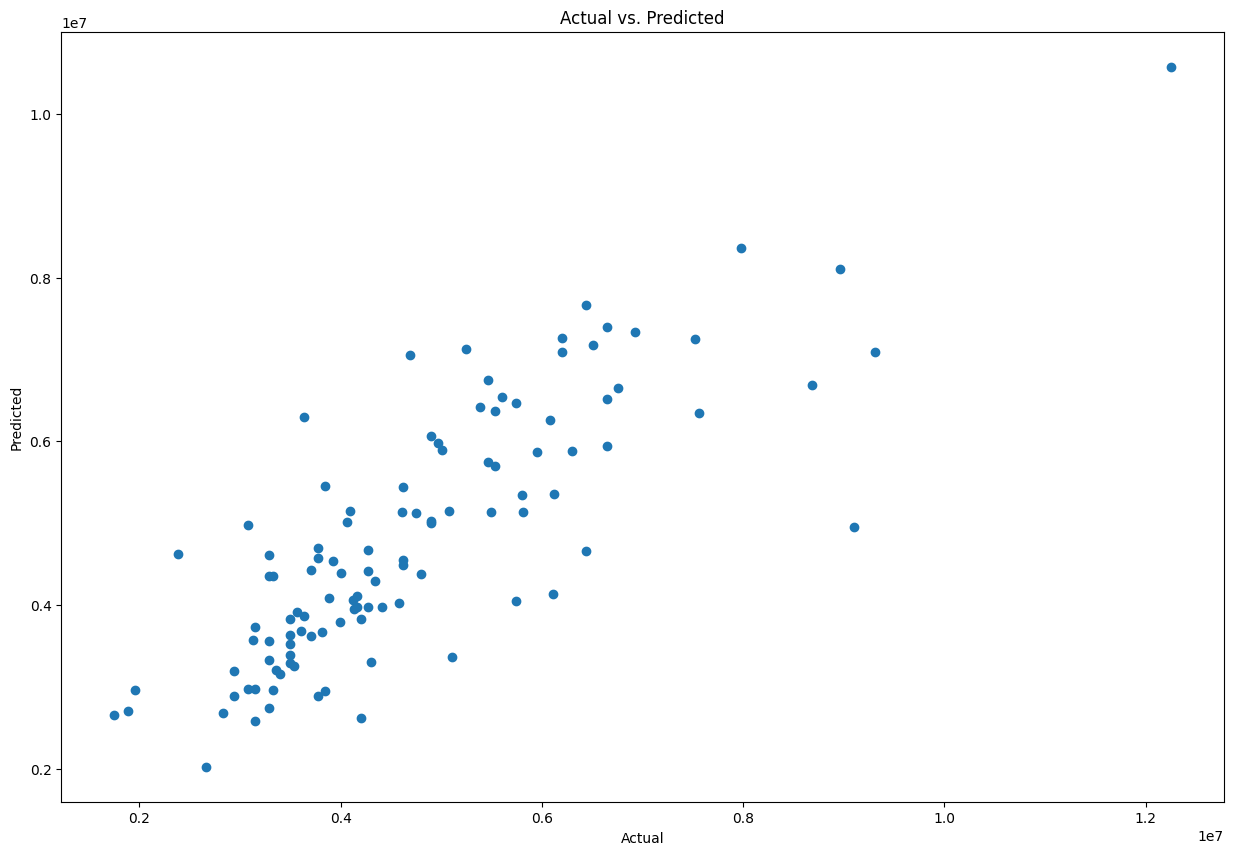

In [34]:
# visualization to see the predictive vs the actual
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot(color='red',linewidth=2)
plt.show()